# Probability Review

In this notebook, lets review some of the basics of probability, in preparation for **Bayes rule** and **markov chains**!

In [1]:
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

# for creating animations
import matplotlib.animation
from IPython.display import HTML

In [2]:
# styling additions
from IPython.display import HTML
# style = "<style>div.warn{background-color: #fcf2f2;border-color: #dFb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;}</style>"
style = "<style>div.info{padding: 15px; border: 1px solid transparent; border-left: 5px solid #dfb5b4; border-color: transparent; margin-bottom: 10px; border-radius: 4px; background-color: #fcf8e3; border-color: #faebcc;}</style>"
HTML(style)

In [3]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [4]:
sblue,sorange,sgreen,sred = sns.color_palette()[0:4]

Lets review the basics, by starting normally 😏

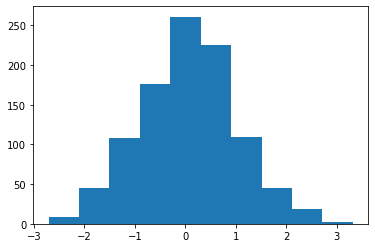

In [5]:
samples = np.random.standard_normal(1000)
plt.hist(samples);

Lets actually plot the **probability density function (PDF)**:

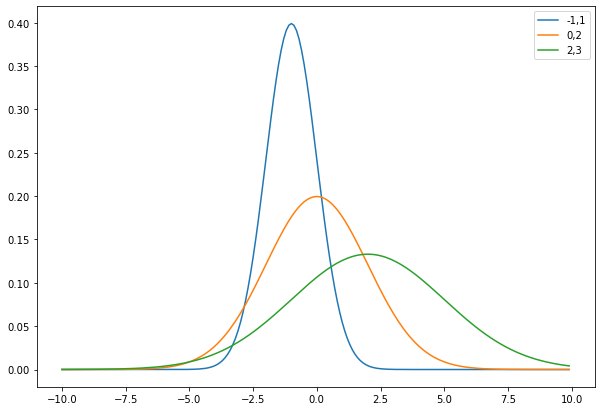

In [6]:
from scipy.stats import norm
rv = norm(loc = -1., scale = 1.0)
rv1 = norm(loc = 0., scale = 2.0)
rv2 = norm(loc = 2., scale = 3.0)

x = np.arange(-10, 10, .1)

plt.figure(figsize=(10,7))
plt.plot(x, rv.pdf(x), label='-1,1');
plt.plot(x, rv1.pdf(x), label='0,2');
plt.plot(x, rv2.pdf(x), label='2,3');
plt.legend();

Lets pick a **standard normal** and plot its PDF and its **cumulative distribution function (CDF)**

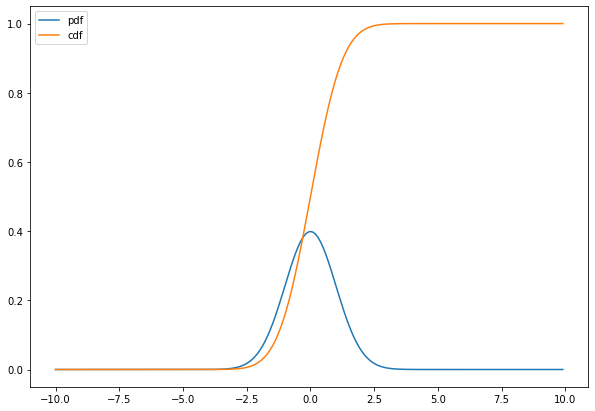

In [7]:
plt.figure(figsize=(10,7))
plt.plot(x,norm.pdf(x),color=sblue,label='pdf');
plt.plot(x,norm.cdf(x),color=sorange,label='cdf');
plt.legend();

Hm... Does this look familiar?

<div class="info">

<font size="6">🧐</font>**Pause-and-ponder**: What does this remind you of?

</div>

After a few minutes thought, you might recall the logistic function, and its derivative that we've been using in our neural network discussion! 

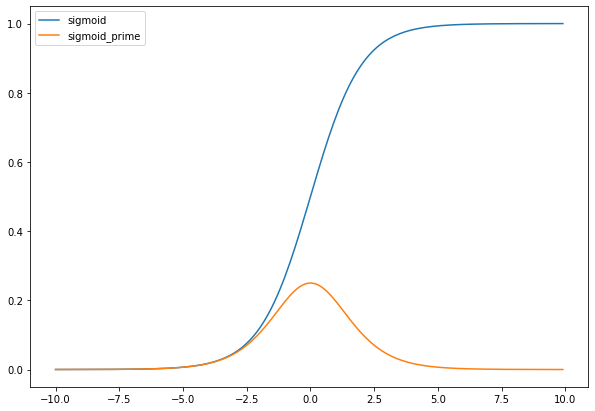

In [8]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

plt.figure(figsize=(10,7))
plt.plot(x,sigmoid(x),color=sblue,label='sigmoid');
plt.plot(x,sigmoid_prime(x),color=sorange,label='sigmoid_prime');
plt.legend();

Hm. Lets plot them together and see!! 

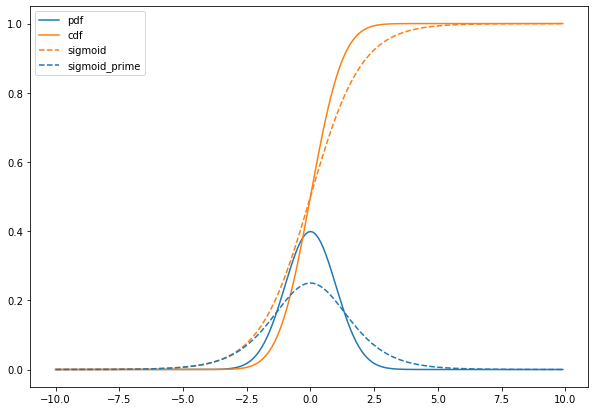

In [9]:
plt.figure(figsize=(10,7))
plt.plot(x,norm.pdf(x),color=sblue,label='pdf');
plt.plot(x,norm.cdf(x),color=sorange,label='cdf');
plt.plot(x,sigmoid(x),color=sorange,linestyle='--',label='sigmoid');
plt.plot(x,sigmoid_prime(x),color=sblue,linestyle='--',label='sigmoid_prime');
plt.legend();

<div class="info">

<font size="6">🧐</font>**Pause-and-ponder**: What can you say about this plot?

</div>

Hm. Maybe something non obvious is going on here, so its worth thinking about this for a second, and reminding ourselves of the definitions.

<div class="info">

<font size="6">📖 </font>**Semi-Definition**: A **cumulative distribution function (CDF)** is (almost) any **monotonically increasing** function whose range is $(0,1)$, describing the probability of a random variable $X$ being less than a specific value $x$:
    
$$
F_X (x) = P(X \leq x)
$$

</div>

**Note:** We aren't being that careful in our definition (continuity, etc., etc.), but it serves us well enough to illustrate our purposes.

**Note:** Monotonically increasing is a fancy way to say **not decreasing.**

With this definition in mind, lets revisit the plot of the normal CDF:

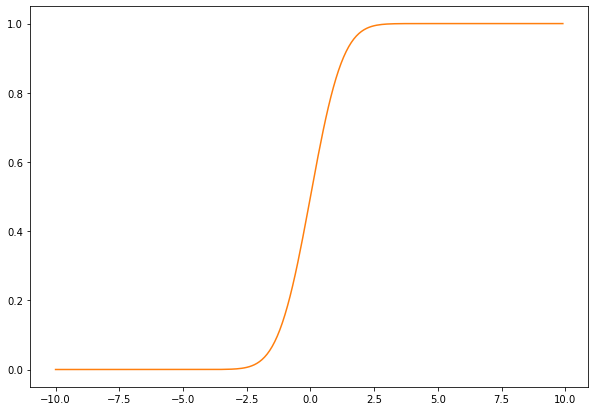

In [10]:
plt.figure(figsize=(10,7))
plt.plot(x,norm.cdf(x),color=sorange,label='cdf');

Ok, so what is $F(0)$? Its $P(X<0)$, and we can see that this function tells us that its 0.5! Lets verify:

In [11]:
norm.cdf(0)

0.5

Ah. What about the sigmoid?

In [12]:
sigmoid(0)

0.5

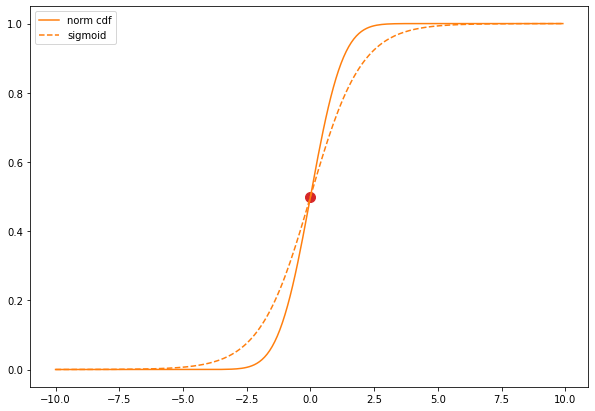

In [13]:
plt.figure(figsize=(10,7))
plt.plot(x,norm.cdf(x),color=sorange,label='norm cdf');
plt.plot(x,sigmoid(x),color=sorange,linestyle='--',label='sigmoid');
plt.scatter(0,norm.cdf(0),color=sred,s=100)
plt.legend();

Interesting. So they both agree on this point, but clearly, they don't agree everywhere! 

Wait. **So are we saying that the logistic function is also a CDF?**

Yes! Indeed it is! 

Well, then we can use this to leap towards the following question: 

If `sigmoid` is the CDF, then what is `sigmoid_prime`? 

Well by our graph above, it sure looks a lot like a Gaussian density/PDF! 

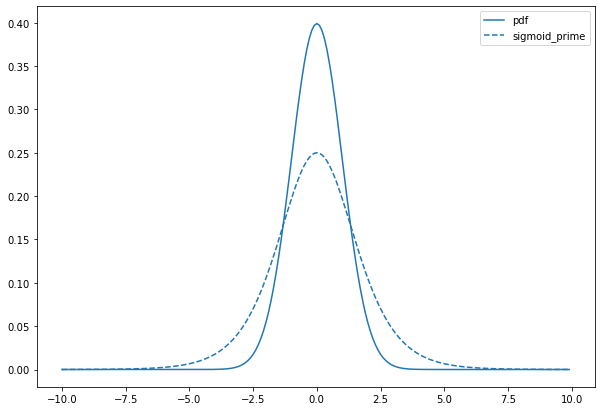

In [14]:
plt.figure(figsize=(10,7))
plt.plot(x,norm.pdf(x),color=sblue,label='pdf');
plt.plot(x,sigmoid_prime(x),color=sblue,linestyle='--',label='sigmoid_prime');
plt.legend();

Indeed it is! `sigmoid_prime` is a PDF! So we have "discovered" the following relationship between CDFs and PDFs:


<div class="info">

<font size="6">📖 </font>**Semi-Definition**: A **probability density function (PDF)** is the **derivative** of a CDF:

$$
f_X(x) = \frac{d}{dx}F_X(x)
$$

Accordingly, the probability of $X$ falling within a range $(a,b)$ is given by:

$$
P(a \leq X \leq b) = \int_a^b f_X(x) dx
$$
    
</div>

It should be easy to see then that:

$$
P(-\infty \leq X \leq x) = \int_{-\infty}^{x} f_X(u)du = F_X(x)
$$

<div class="info">

<font size="6">🧐 </font>**Note**: There is **much** more we can say here about PDFs vs PMFs. For example:

 * how they are **not** the same thing
 * how the prob of a continuous RV taking on a specific point is 0.
 * inverse CDFs, and inverse transform sampling
 * etc. 
    
Keep these technicalities in your mind, though we will freely be jumping between continuous and discrete RVs in our treatment since you've all already had a formal probability class.
    
</div>

## Thinking about the tails

Ok, so whats the difference between the gaussian density and the logistic density? 

**Its all in the tails**.

This is a **fantastic thinking tool** to keep in mind when you're thinking about the behavior of distributions/probabilistic objects. 

In order to aid this kind of thinking, we will do something very common in probability. Instead of thinking of them *directly*, we will think about **log-probabilities**.

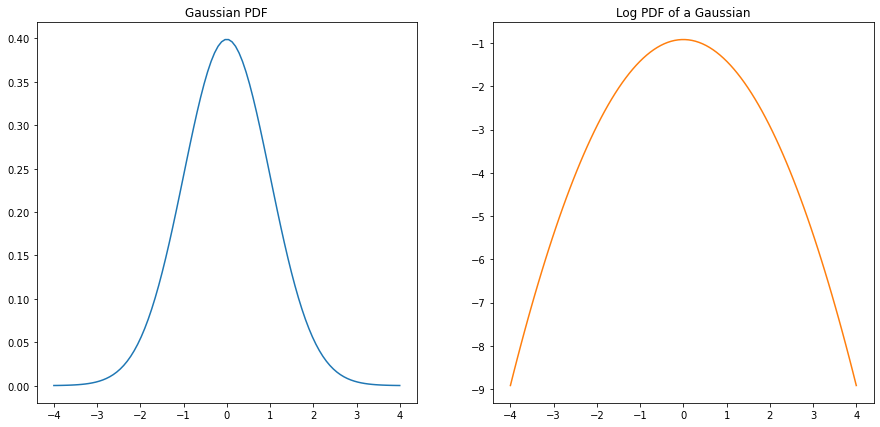

In [15]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))
x = np.linspace(-4,4,100)
ax1.plot(x,norm.pdf(x));
ax1.set_title('Gaussian PDF')
ax2.plot(x,norm.logpdf(x),color=sorange);
ax2.set_title('Log PDF of a Gaussian');

<div class="info">

<font size="6">🧐 </font>**Pause-and-ponder**: Does the shape of this make sense? Why or why not?
    
</div>

Lets compare this to the logistic density we gave above:

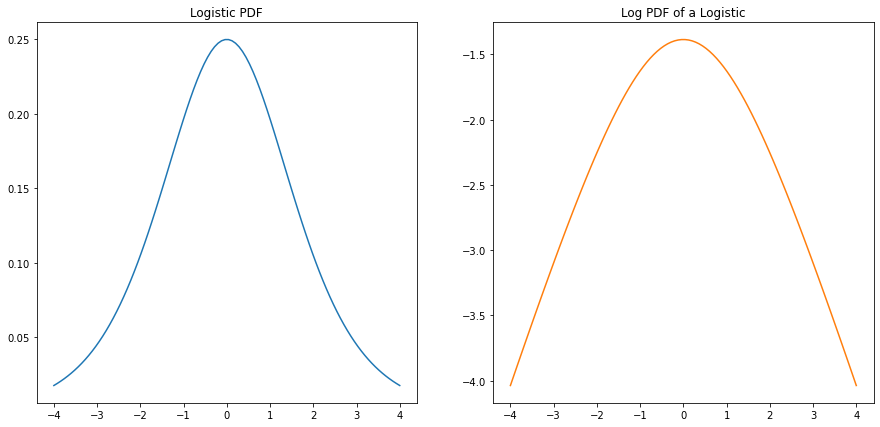

In [16]:
from scipy.stats import logistic
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))
x = np.linspace(-4,4,100)
ax1.plot(x,logistic.pdf(x));
ax1.set_title('Logistic PDF')
ax2.plot(x,logistic.logpdf(x),color=sorange);
ax2.set_title('Log PDF of a Logistic');

Hm. Lets plot them together to get a better idea, and add in a **cauchy** distribution:

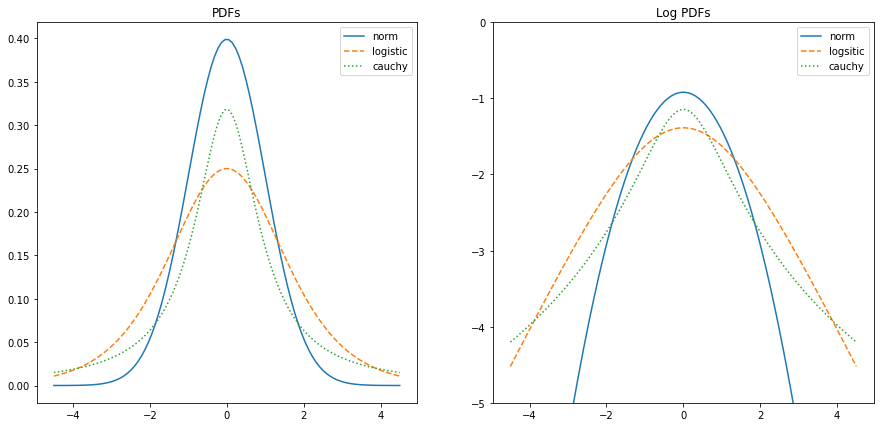

In [17]:
from scipy.stats import logistic
from scipy.stats import cauchy
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))
x = np.linspace(-4.5,4.5,100)
ax1.plot(x,norm.pdf(x),label='norm');
ax1.plot(x,logistic.pdf(x),linestyle='--',label='logistic');
ax1.plot(x,cauchy.pdf(x),linestyle=':',label='cauchy');
ax1.set_title('PDFs')
ax1.legend();

ax2.plot(x,norm.logpdf(x),label='norm');
ax2.plot(x,logistic.logpdf(x),linestyle='--',label='logsitic');
ax2.plot(x,cauchy.logpdf(x),linestyle=':',label='cauchy');
ax2.set_title('Log PDFs');
ax2.set_ylim([-5,0]);
ax2.legend();

Play around with the graph above, and lets discuss what we observe:

# The Log

Lets look a bit deeper into the log:

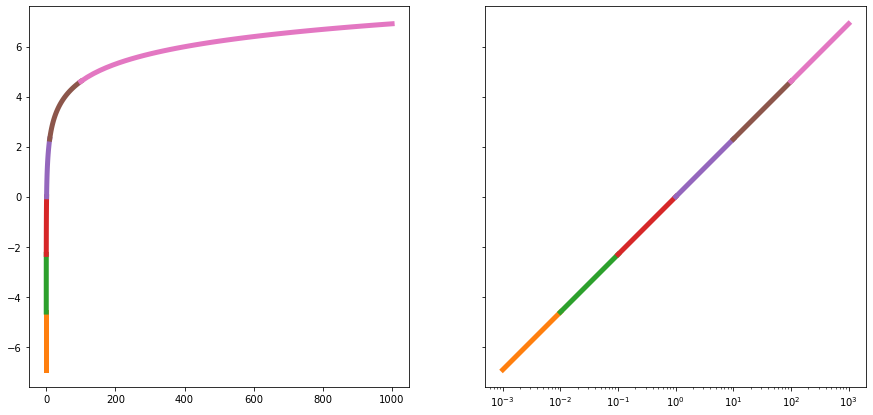

In [18]:
x = np.linspace(1e-3,1e3,1000)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7),sharey=True)
ax1.plot(x,np.log(x))
ax2.set_xscale('log')
ax2.plot(x,np.log(x));

xs=np.linspace(1e-3,1e-2);ax2.plot(xs,np.log(xs),linewidth=5);ax1.plot(xs,np.log(xs),linewidth=5);
xs=np.linspace(1e-2,1e-1);ax2.plot(xs,np.log(xs),linewidth=5);ax1.plot(xs,np.log(xs),linewidth=5);
xs=np.linspace(1e-1,1);ax2.plot(xs,np.log(xs),linewidth=5);ax1.plot(xs,np.log(xs),linewidth=5);
xs=np.linspace(1,10);ax2.plot(xs,np.log(xs),linewidth=5);ax1.plot(xs,np.log(xs),linewidth=5);
xs=np.linspace(10,1e2);ax2.plot(xs,np.log(xs),linewidth=5);ax1.plot(xs,np.log(xs),linewidth=5);
xs=np.linspace(1e2,1e3);ax2.plot(xs,np.log(xs),linewidth=5);ax1.plot(xs,np.log(xs),linewidth=5);

The distance between `0.000001` and `0.0000001` is as **big as the distance between `100` and `1000`**. Or the distance between `00000000000.1` and `000000000000.1`

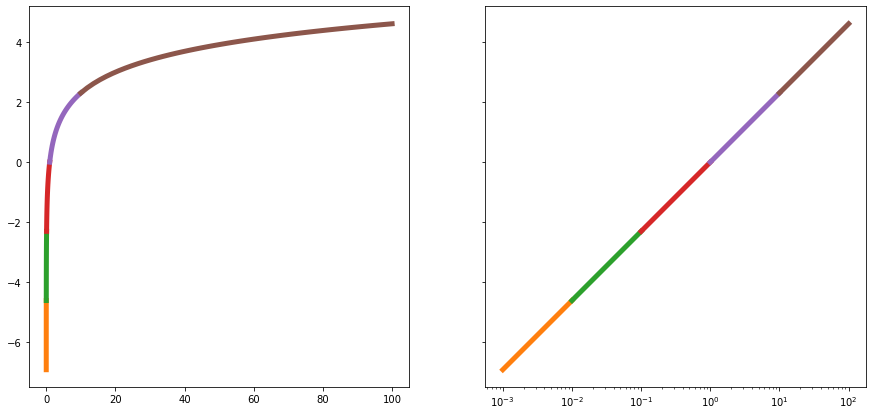

In [19]:
x = np.linspace(1e-3,1e2,1000)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7),sharey=True)
ax1.plot(x,np.log(x))
ax2.set_xscale('log')
ax2.plot(x,np.log(x));

xs=np.linspace(1e-3,1e-2);ax2.plot(xs,np.log(xs),linewidth=5);ax1.plot(xs,np.log(xs),linewidth=5);
xs=np.linspace(1e-2,1e-1);ax2.plot(xs,np.log(xs),linewidth=5);ax1.plot(xs,np.log(xs),linewidth=5);
xs=np.linspace(1e-1,1);ax2.plot(xs,np.log(xs),linewidth=5);ax1.plot(xs,np.log(xs),linewidth=5);
xs=np.linspace(1,10);ax2.plot(xs,np.log(xs),linewidth=5);ax1.plot(xs,np.log(xs),linewidth=5);
xs=np.linspace(10,1e2);ax2.plot(xs,np.log(xs),linewidth=5);ax1.plot(xs,np.log(xs),linewidth=5);

# Bayes Rule

Now we've come to a very simple to prove, but very powerful theorem in probability, Bayes rule.

Lets start with the following observations:

$$
\begin{align}
P(A,B) &= P(A)P(B|A) \\
       &= P(B)P(A|B)
\end{align}
$$

So:

$$
P(A)P(B|A) = P(B)P(A|B)
$$

Solving for one of them:

$$
P(B|A) = \frac{P(B)P(A|B)}{P(A)}
$$

And thats it! This is Bayes rule! 

This is the simple probability rule presentation, but its usually stated like this:

Let $X$ be a random variable representing a latent (hidden) property you would **like to learn something about by gathering a dataset $Y$.**

Well, then we specify a **prior distribution** over our latent variable $X$: $P(X)$. This represent any information we have (or think we have) about $X$ **before** seeing any data. 

As an example, lets imagine we specify a Gaussian density: $\mathcal{N}(3,2)$:

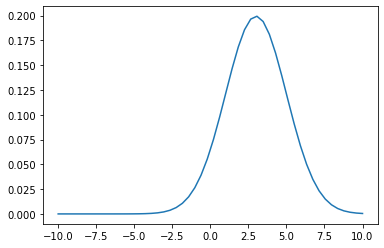

In [20]:
x = np.linspace(-10,10)
prior = lambda points: norm.pdf(points,loc=3,scale=2)
plt.plot(x,prior(x));

Note: this does **not** specify a probability of zero anywhere!

---

We also specify a **likelihood**: $P(Y|X)$ which is a **conditional probability** telling us how likely our data is **under different values of $X$**. 

**Note**: This likelihood is **a (conditional) distribution over $y$s!**. That is to say, once we specify a specific $X=x$ value to condition on, we have a distribution over all of our $Y$! 

Think about this point - its a very common point of confusion for students when they are first starting out. 

Lets give one:

In [21]:
y = np.linspace(48,84)
likelihood = lambda points,xval: norm.pdf(points,loc=xval,scale=10)

Now, lets plot this conditional probability for a specific x value: 

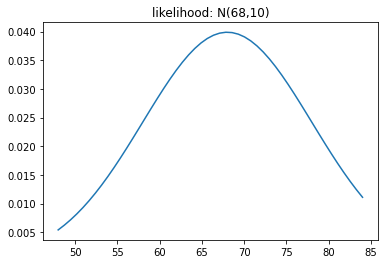

In [22]:
x_cond = 68
plt.plot(y,likelihood(y,x_cond));
plt.title(f"likelihood: N({x_cond},10)");

How does this behave for different values of x? Lets plot it! 

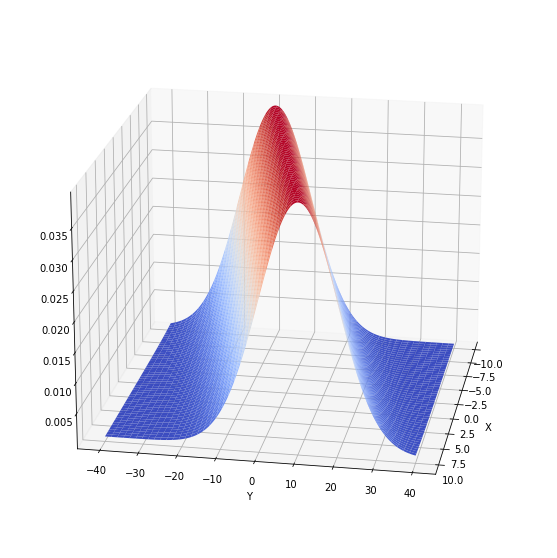

In [23]:
x_range = np.linspace(-10,10,1000)
y_range = np.linspace(-40,40,1000)
X,Y = np.meshgrid(x_range,y_range)
vals = likelihood(Y,X)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,vals,cmap='coolwarm');
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.view_init(elev=20,azim=10)

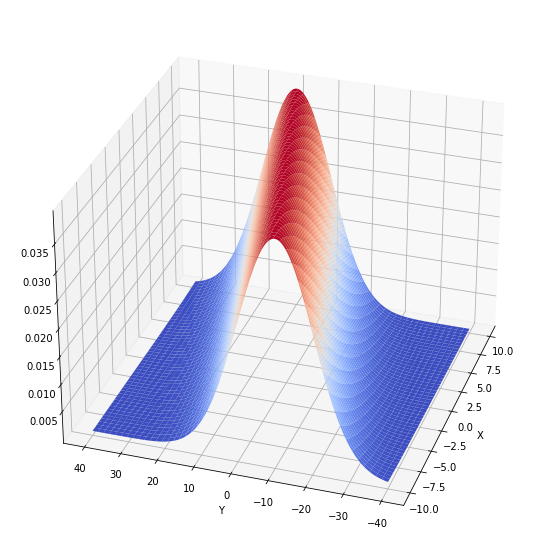

In [24]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,vals,cmap='coolwarm');
ax.set_xlabel('X')
ax.set_ylabel('Y')

def update_graph(angle):
    ax.view_init(elev=30,azim=angle*2)
    
anim = matplotlib.animation.FuncAnimation(fig, update_graph,
                                         frames=range(100),
                                         interval=50, blit=False)

HTML(anim.to_html5_video())

---

We then multiply these two distributions to get the **numerator** in Bayes rule. This is **not** a true distribution (it does not integrate to 1). It needs to be **normalized**, by the **model evidence** $P(Y)$:


$$
\frac{P(X)P(Y|X)}{P(Y)}
$$

The model evidence is also almost always **calculated** using the law of **total probability**:

$$
P(Y) = \sum_i P(Y|X_i)P(X_i)
$$

So you will often find Bayes rule written as:

$$
P(X|Y) = \frac{P(X)P(Y|X)}{\sum_i P(X_i)P(Y|X_i)}
$$

The conditional distribution Bayes rule gives us is called **the posterior distribution**. 

So, one way to describe what Bayes rule is doing, is allowing us to **update our prior beliefs** represented by the **prior distribution** $P(X)$, by gathering **evidence/data**, represented by the **normalized-likelihood**: $\frac{P(Y|X)}{\sum_i P(X_i)P(Y|X_i)}$ to generate the posterior (conditional) distribution $P(X|Y)$.

$$
P(X) \overset{\text{Bayes Rule}}{\longrightarrow} P(X|Y)
$$

Another way to say this, is that it gives us a principled way to update our beliefs after gathering evidence. 

## Drug testing example

A common example problem for Bayes rule is the drug testing problem. 

Lets assume the following:


* probability of a general member of the public having a disease is $1/100000$
* probability of having a symptom given that you have the disease is: $1$.
* probability of a non-diseased person having a symptom is: $1/10000$. 
* 

$$
\begin{align}
P(\text{Disease} | \text{Symptoms}) &= \frac{P(\text{Disease})\;P(\text{Symptoms}|\text{Disease})}{P(\text{Symptoms})} \\
& = \frac{P(\text{Disease})\;P(\text{Symptoms}|\text{Disease})}{P(\text{Symptoms}|\text{Disease})P(\text{Disease}) + P(\text{Symptoms}|\text{NON-Disease})P(\text{NON-Disease})}
\end{align} 
$$

# Coin flip example

Often, any difficulty in sampling from the posterior distribution is side-stepped, by using **conjugate priors**. That is, priors that when multiplied by a particular likelihood, give you a known analytical form of the posterior. 

For example, a guassian prior and likelihood give you a gaussian prior. 

Then there is the usual coin-flip problem, where we are trying to guess the "fairness" (head/tails probability) of a coin $\theta$, based on flips $D$.

For this problem, a natural likelihood is the binomial/bernoulli distribution, and its conjugate prior is the beta distribution.

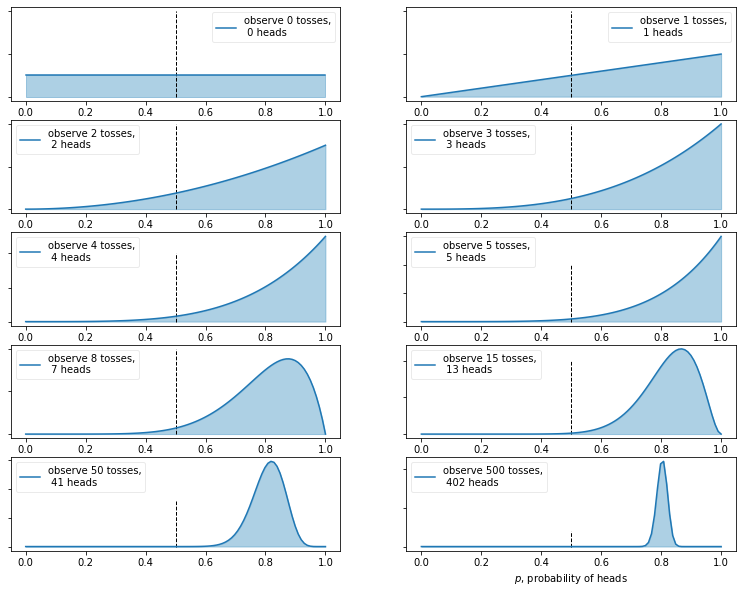

In [25]:
import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.8, size=n_trials[-1])
x = np.linspace(0, 1, 100)

plt.figure(figsize=(13,10))
for k, N in enumerate(n_trials):
    sx = plt.subplot(int(len(n_trials)/2), 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)


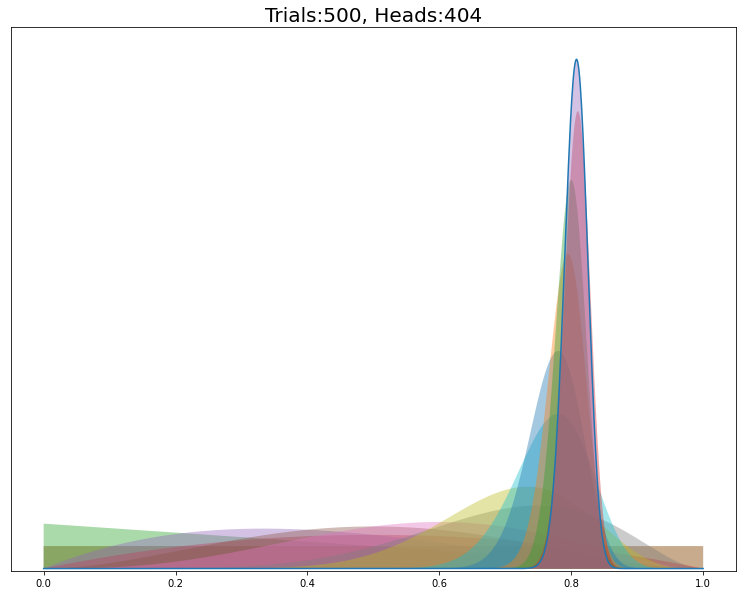

In [26]:
coin_prob = 0.8
dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 100, 200, 300, 400, 500]
data = stats.bernoulli.rvs(coin_prob, size=n_trials[-1])
x = np.linspace(0, 1, 1000)
fig = plt.figure(figsize=(13,10))
ax = plt.gca()
dist_plot,=plt.plot([],[])
ax.set_ylim([-0.1,24.1])
ax.axes.get_yaxis().set_visible(False)
def update_plot(i):
    N = n_trials[i]
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    dist_plot.set_data(x, y)
    ax.fill_between(x, 0, y, alpha=0.4)
    ax.set_title(f'Trials:{N}, Heads:{heads}',fontsize=20)

    
anim = matplotlib.animation.FuncAnimation(fig, update_plot,
                                         frames=range(len(n_trials)),
                                         interval=500, blit=False)

HTML(anim.to_html5_video())

---
# Sampling

Above, we've seen how we can actually use the posterior distribution to represent our updated beliefs, after gathering data.


The problem we will be interested in, is when we **cannot easily sample from the posterior distribution**. This is almost always because we cannot calculate the **normalization constant**! 

So, we can only reason about the **shape** of our posterior:

$$
P(X|Y) \propto P(X) P(Y|X)
$$

This lets us make relative comparisons, and find point estimates, but not directly sample from the posterior! 

Critically, it also doesn't let us reason about the uncertainty in our estimates! For this, we need the actual samples!

## Variational Bayes

Often, you'll find Bayes rule written with a log:

$$
\log P(X|Y) = \log P(X) + \log P(Y|X) - \log P(Y)
$$

This form is often used in optimization problems, where we are tying to find a **variational approximation the posterior distribution**. 

In these problems, our data is **fixed**, and so we can rewrite Bayes rule to expose this **variational principle**:

$$
\begin{align}
\log P(Y) &= \log P(X) + \log P(Y|X) - \log P(X|Y) \\
          &= \log P(X) - [\log P(X|Y) - \log P(Y|X)] 
\end{align}
$$

Notice that the left hand side **does not change**. 

<div class="info">

<font size="6">🧐</font>**Pause-and-ponder**: Think about this. What does this suggest is a good thing to check for in an optimization problem? What is the left hand side? What about the right?
    
We can think about some pretty advanced methods using this basic observation!
    
</div>

We will not explore these topics further in this course, but we've gone a long way just by exposing you to this kind of thinking! 

## Inverse Transform Sampling

Lets start by looking at the CDF of a Gaussian RV:

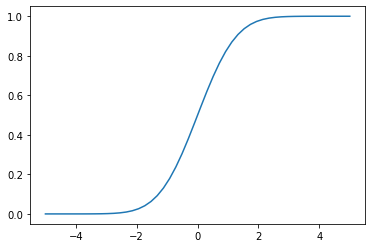

In [27]:
plt.plot(np.linspace(-5,5),norm.cdf(np.linspace(-5,5)));

Recall, this tells us:

$$
F_X(x) = P(X\leq x)
$$

<div class="info">

<font size="6">🧐</font>**Pause-and-ponder**: What happens if I plug in a Gaussian random variable into its own CDF? 
    
What question am I asking in doing so?
    
</div>

Lets cary the experiment out!

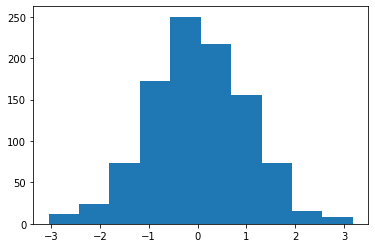

In [28]:
samples = np.random.standard_normal(1000)
plt.hist(samples);

Now lets plug them into the CDF and plot:

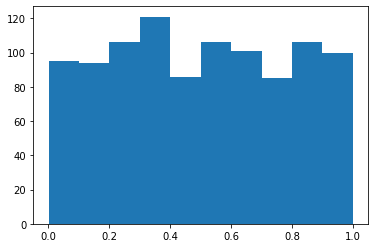

In [29]:
plt.hist(norm.cdf(samples));



<div class="info">

<font size="6">🧐</font>**Pause-and-ponder**: What do we see here? Does this make sense with what you said above? Think about this! 

</div>

Ah - A random variable plugged into its own CDF gives a uniform rv. 

Hm. So a CDF tell us the prob that $X$ is in a certain range. Well, it shouldn't surprise you that we can also define an **inverse cdf**, also called a **quantile function**, which is the "inverse" of this property. 

So in a CDF you plug in values, and get back a probability. Well, for an inverse CDF you plugin probabilities and get back values! 

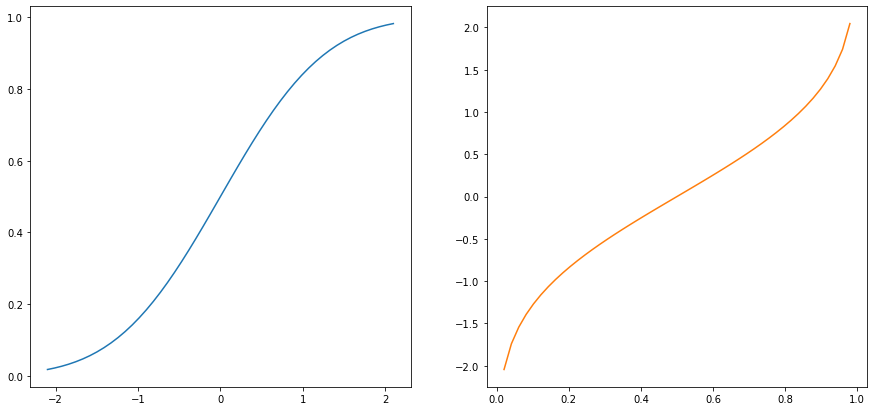

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,7))
x = np.linspace(-2.1,2.1)
ax1.plot(x,norm.cdf(x));

p = np.linspace(0,1)
ax2.plot(p,norm.ppf(p),c=sorange);

<div class="info">

<font size="6">🧐</font>**Pause-and-ponder**: What would happen if we plug in uniform values into an inverse CDF? What question is that asking? 

</div>


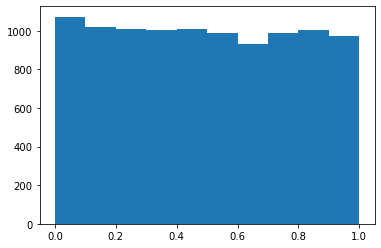

In [31]:
samples = np.random.rand(10000)
plt.hist(samples);

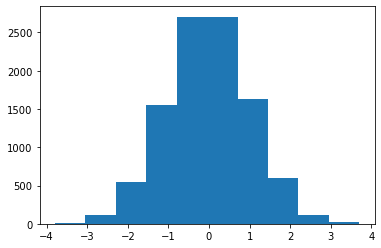

In [32]:
plt.hist(norm.ppf(samples));

Aha! So plugging in uniform values into an inverse CDF gives samples from the original CDF! 

We've discovered **inverse transform sampling**!

If we can:
* draw samples from a uniform distribution (easy)
* represent a distribution by its CDF (not always easy!)

We can easily draw samples from that distribution! 

## Rejection Sampling

Above, we saw one way to sample from a distribution. Lets look at another here.

Lets introduce it by way of a fun problem: try and build a **probabilistic** way to **estimate the value of $\pi$!**


<div class="info">

<font size="7">🗣</font>**Discuss**: Can anyone think of a way to do this? Lets 
    
</div>


Lets do one way: start by taking samples in the unit square:

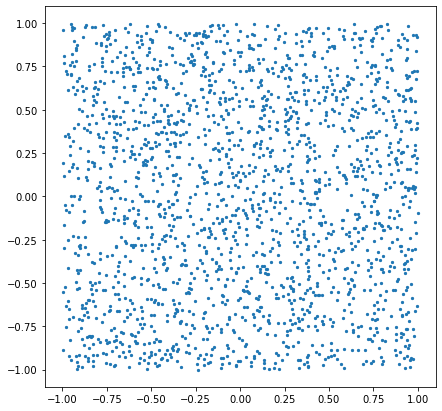

In [33]:
samples = # EDIT HERE

plt.figure(figsize=(7,7))
plt.scatter(samples[:,0],samples[:,1],s=5);

<div class="info">

<font size="6">🧐</font>**Pause-and-ponder**: How can we build an estimator for the value of $\pi$ from this?
    
</div>

Try it! Lets plot the unit-circle:

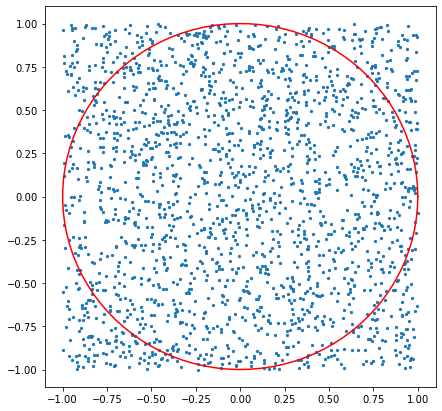

In [34]:
plt.figure(figsize=(7,7))
plt.scatter(samples[:,0],samples[:,1],s=5);
theta = np.linspace(0, 2*np.pi, 100);
r = np.sqrt(1.0);x1 = r*np.cos(theta);x2 = r*np.sin(theta)
plt.plot(x1,x2,'r');

Ah. So lets take the ratio of samples that fall in the unit circle, as an estimator **for its area**, and the total number of samples as estimator **for the the area of the square**. 

With this, we can calculate:

$$
\frac{\text{area of circle}}{\text{area of square}} = \frac{\pi r^2}{(2r)^2}  = \frac{\pi}{4}
$$

So the ratio of our areas is an estimator for $\pi/4$! 

Lets see how many samples fall within the unit circle:

In [35]:
inCirc = # EDIT HERE

Lets plot them:

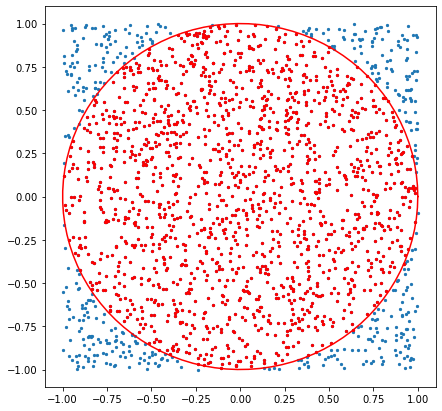

In [36]:
plt.figure(figsize=(7,7))
plt.scatter(samples[:,0],samples[:,1],s=5);
plt.plot(x1,x2,'r');
plt.scatter(samples[inCirc][:,0],samples[inCirc][:,1],s=5,c='r');

Ok! So we can count the proportion of red circles to total circles, giving us an estimate of the area of the circle relative to the square:

In [37]:
relArea = # EDIT HERE
relArea

0.779

Lets  multiply by 4 to see how we did! 

In [38]:
pi_est = # EDIT HERE
pi_est

3.116

Hm. Not bad! Lets write a function and see how we do with more samples:

In [39]:
def estimate_pi(samples_list):
    vals = []
    for sample_num in samples_list:
        samples = # EDIT HERE
        inCirc = # EDIT HERE
        vals.append(len(samples[inCirc])/len(samples))
    return vals

Lets plot it! 

In [40]:
samples_list = [1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]
pi_estimates = estimate_pi(samples_list)

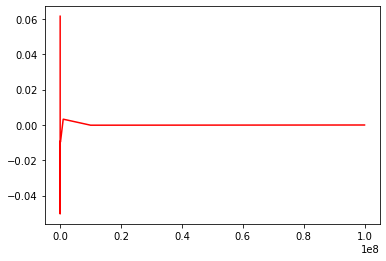

In [41]:
plt.plot(samples_list,[np.pi - curr*4 for curr in pi_estimates],'r');

We've looked at fun little rejection sampling problem. 

Broadly speaking, **rejection sampling** is interested in using a **proxy distribution** which is **easy to sample from**, to simulate samples from **another distribution** that its usually **hard** to sample from. 

It does this by **oversampling** from the easy one, and throwing away the ones that don't match an inclusion criteria (rejection them). Rejection samplers, therefore, have a concept of "efficiency", which tell you how many samples you needed to generate to have one included, or how many you ended up throwing away, etc. Or, how many samples do you need to achieve a certain accuracy, etc. 

They can be roughly thought of a kind of **Monte Carlo** technique, where **Monte Carlo Methods** can be described as **random sampling algorithms**. 

---

# MCMC
There is much more we can say about Monte Carlo methods more broadly, but our interest here is in using **Markov Chains** to build a sampler! This is called Markov Chain Monte Carlo (MCMC)! 